# Data Analysis Report
- A report of the retained data and it contains things like data distribution, time window, frequency band, SNR statistics, waveform plot in event gather, etc.
- For making the data analysis report, I have used **NEFS** data from **IRIS** provider for the duration **2018-2019**. Since, the number of processed files are too large, I have used data from only a single event.

In [1]:
import os
import glob
import obspy
import pygmt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from obspy.io.sac.sactrace import SACTrace
from obspy.io.sac.util import get_sac_reftime
from IPython.display import clear_output

In [2]:
read_root_dir = "/media/elemento/Element/NTU_RW/NEFS"
write_root_dir = "/home/elemento/Music/Processing/Report_NEFS"

try:
    os.mkdir(write_root_dir)
except:
    print("The directory already exists!")

The directory already exists!


In [3]:
provider = "IRIS"
year1 = 2018
year2 = 2019

data_sac = f'{read_root_dir}/Download/{provider}/SAC/{year1}'
os.listdir(data_sac)

['20180107064715830000',
 '20180111183815120000',
 '20180307211307880000',
 '20180317195903160000',
 '20180420222924410000',
 '20180424040835760000',
 '20180424122335000000',
 '20180602054605330000',
 '20181010102806700000']

In [4]:
# Creating an info file (in the write directory)
os.chdir(write_root_dir)
f = open(f"saclist_{provider}", "w")
f.write("sacfile dist evdp mag Tp Tb stlo stla evlo evla\n")

48

- For checking out the information contained in a single SACTrace, refer to this [page](https://docs.obspy.org/packages/autogen/obspy.io.sac.header.html).
- We will be using the following attributes, and we have defined column names as above for these attributes:
    - sacfile: Name of the Event
    - dist: Station to event distance (km)
    - evdp: Event depth below surface (meters)
    - mag: Event magnitude
    - Tp: P Phase arrival time wrt the starting instance
    - b: Beginning value of the independent variable
    - evla: Event latitude (degrees north positive)
    - evlo: Event longitude (degrees east positive)

In [5]:
# Iterating over a single event
for ev in os.listdir(data_sac):
    print("For Event:", ev)
    inpath = os.path.join(data_sac, ev)
    os.chdir(inpath)

    # https://docs.obspy.org/packages/autogen/obspy.io.sac.header.html
    # Iterating over all the SAC files
    for sac in glob.glob("*.SAC.bp"):
        st = SACTrace.read(sac)
        evtnm = "{}.{}.{}.{}".format(str(sac).split(".")[0],str(sac).split(".")[1],str(sac).split(".")[2],str(sac).split(".")[3])
        dist = st.dist
        evdp = st.evdp
        mag = st.mag
        Tp = st.t1
        Tb = st.b
        stlo = st.stlo
        stla = st.stla
        evlo = st.evlo
        evla = st.evla
    
        f.write("%s %.0f %.1f %g %g %g %g %g %g %g\n" % (evtnm,dist,evdp,mag,Tp,Tb,stlo,stla,evlo,evla))        
    break
    
# Close the info file
f.close()

For Event: 20180107064715830000


In [6]:
df = pd.read_csv(f"{write_root_dir}/saclist_{provider}", sep=" ", 
    usecols=["sacfile","dist","evdp","mag","Tp","Tb","stlo","stla","evlo","evla"])

df.describe()

,dist,evdp,mag,Tp,Tb,stlo,stla,evlo,evla
count,688.000000,6.880000e+02,6.880000e+02,688.000000,688.000000,688.000000,688.000000,688.000,6.880000e+02
mean,7976.257267,4.030000e+01,5.800000e+00,668.388988,0.017436,-53.804392,42.988227,94.808,2.470000e+01
std,1831.329219,7.110597e-15,1.777649e-15,113.205996,0.012657,113.138627,31.830731,0.000,7.110597e-15
min,2545.000000,4.030000e+01,5.800000e+00,300.319000,0.000000,-178.814000,-66.279200,94.808,2.470000e+01
25%,7454.500000,4.030000e+01,5.800000e+00,649.254000,0.010000,-149.475500,38.992325,94.808,2.470000e+01
50%,8589.000000,4.030000e+01,5.800000e+00,710.045000,0.019998,-130.763000,58.048750,94.808,2.470000e+01
75%,9057.500000,4.030000e+01,5.800000e+00,732.866750,0.020000,28.244350,63.171975,94.808,2.470000e+01
max,10778.000000,4.030000e+01,5.800000e+00,807.630000,0.070000,179.302000,78.182300,94.808,2.470000e+01


## Observations
- Since all the signals belong to a single event, hence, there is no point in plotting the **Events Distribution**.
- The same observation holds true for other properties that depends only on the signal, for instance **Depth and Magnitude**

In [7]:
# The Event's Coordinates are as follows:
print("Longitude for the Event:", df.evlo[0])
print("Latitude for the Event:", df.evla[0])

# Depth and Magnitude of the Event
print("Depth of the Event:", df.evdp[0])
print("Magnitude of the Event:", df.mag[0])

Longitude for the Event: 94.808
Latitude for the Event: 24.7
Depth of the Event: 40.3
Magnitude of the Event: 5.8


## Plotting the Stations Distribution

In [8]:
# Defining the Region
minlon = min(df.stlo)
maxlon = max(df.stlo)
minlat = min(df.stla)
maxlat = max(df.stla)

# Defining the Center Coordinates for the Study Region
lonc = 97
latc = 24

region = [
    minlon, maxlon,
    minlat - 1, maxlat + 1,   
]
print("Coordinates for the Region:", region)

Coordinates for the Region: [-178.814, 179.302, -67.2792, 79.1823]


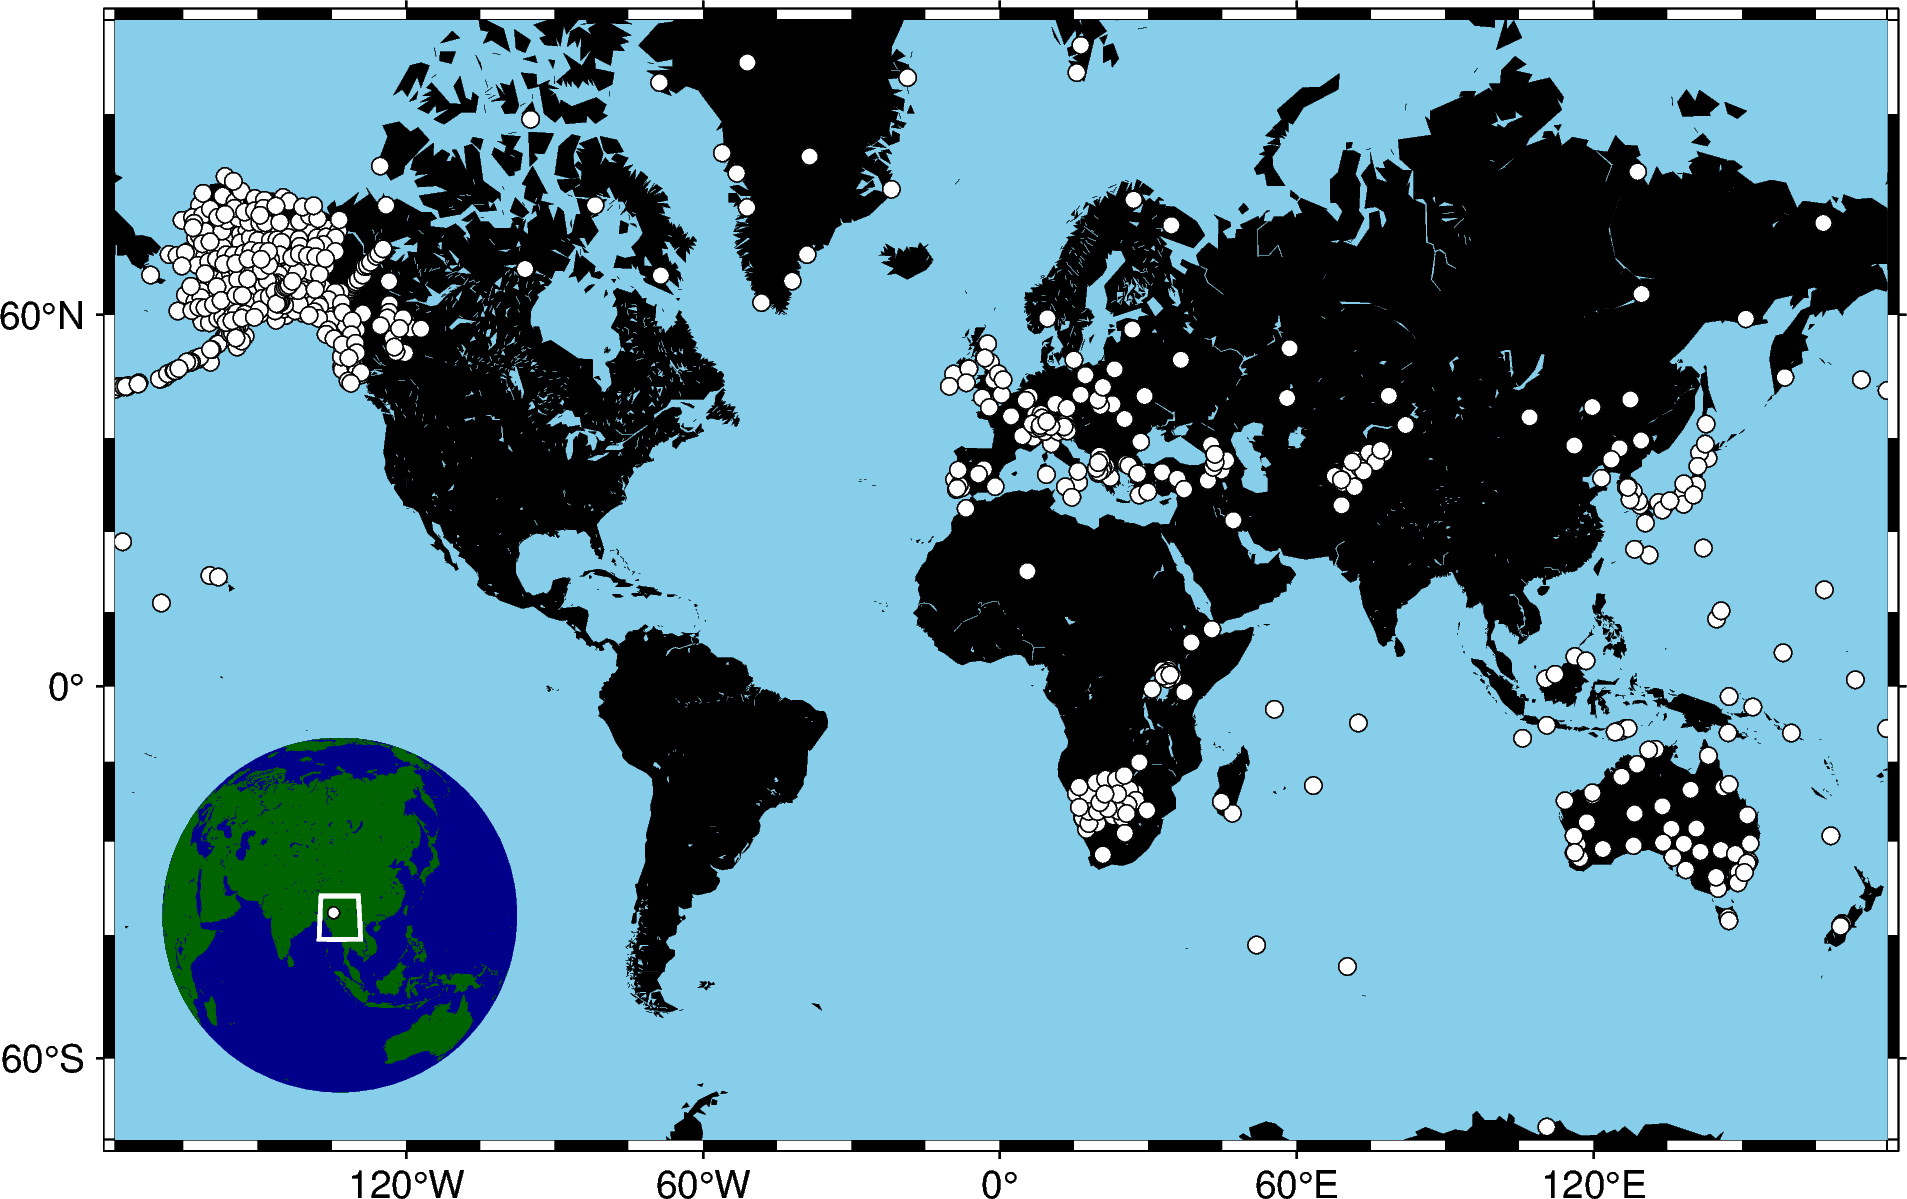

In [16]:
# Plotting circles on the Station Epicenters
fig = pygmt.Figure()
fig.basemap(region = region, projection = "M15c", frame = True)
fig.coast(land = "black", water = "skyblue")
fig.plot(x = df.stlo, y = df.stla, style="c0.15c", color="white", pen="black")

with fig.inset(position="jbl+w3.0c+o0.4c/0.4c"):
    fig.coast(
        region="g",
        projection=f"G{lonc}/{latc}/?",
        land="darkgreen",
        water="darkblue"
    )
    
    # Study area
    fig.plot(
      x = [90, 90, 104, 104, 90],
      y = [16, 30, 30, 16, 16],
      pen = "1p,white"
    )
    
    # Event
    fig.plot(
      x = df.evlo[0],
      y = df.evla[0],
      style="c0.1c",
      color="white", 
      pen="black"
    )
    
fig.show()

## Plotting the Distribution of distance b/w events and station

In [ ]:
print(f"Minimum Distance: {min(df.dist)} km")
print(f"Maximum Distance: {max(df.dist)} km")

plt.hist(df.dist, bins = 43, density = True)
plt.xlabel("Station to event distance (km)")
plt.grid()
plt.show()

## Plotting the Distribution of P-phase arrival time

In [ ]:
print(f"Minimum P-Phase Arrival Time: {min(df.Tp)} seconds")
print(f"Maximum P-Phase Arrival Time: {max(df.Tp)} seconds")

plt.hist(df.Tp, bins = 43, density = True)
plt.xlabel("P-phase arrival time wrt the starting instance")
plt.grid()
plt.show()

## Plotting the Original SNR Statistics

In [ ]:
df = pd.read_csv(f"{write_root_dir}/snr_{provider}.info", sep=" ", names=["snr","sacfile"])
snr_stats = df.snr
snr_stats.describe()

In [ ]:
print(f"Minimum SNR: {min(snr_stats)}")
print(f"Maximum SNR: {max(snr_stats)}")

plt.hist(snr_stats, bins = 43, density = True)
plt.xlabel("SNR")
plt.grid()
plt.show()

## Plotting the Refined SNR Statistics

In [ ]:
snr_ref_stats = pd.Series([stat for stat in snr_stats if stat >= 3])
snr_ref_stats.describe()

In [ ]:
print(f"Minimum SNR: {min(snr_ref_stats)}")
print(f"Maximum SNR: {max(snr_ref_stats)}")

plt.hist(snr_ref_stats, bins = 43, density = True)
plt.grid()
plt.show()